In [1]:
!wget -O dog_and_cat.zip https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2022-04-26 16:31:23--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.72.44.106, 2600:1417:3f:8a0::e59, 2600:1417:3f:898::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.72.44.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘dog_and_cat.zip’

dog_and_cat.zip     100%[===================>] 786.68M   221MB/s    in 3.9s    

2022-04-26 16:31:27 (199 MB/s) - ‘dog_and_cat.zip’ saved [824894548/824894548]



In [ ]:
!unzip dog_and_cat.zip

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from sklearn.model_selection import train_test_split
import seaborn as sns
import pathlib

In [ ]:
path = pathlib.Path('/content/PetImages')
path_list = list(path.glob(r'**/*.jpg'))

In [ ]:
dataset = []
labels = []
for p in path_list:
    img = cv2.imread(str(p))
    try:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except:
        continue
    img = cv2.resize(img, (80,80))
    img = img / 255.0
    if 'Cat' in str(p):
        dataset.append(img)
        labels.append(0)
    if 'Dog' in str(p):
        labels.append(1)
        dataset.append(img)

In [ ]:
dataset = np.array(dataset)

In [ ]:
print(dataset.shape)

(24946, 80, 80, 3)


In [ ]:
x = dataset
y = labels

In [ ]:
print(y[:5])
print(y[-5:])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


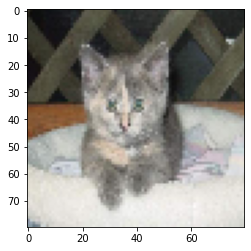

In [ ]:
plt.imshow(x[0])
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
y_train = tf.one_hot(y_train, depth=2)
y_test = tf.one_hot(y_test, depth=2)

In [ ]:
print(y_train[:5])

tf.Tensor(
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


In [ ]:
model = Sequential()
model.add(layers.InputLayer(input_shape=(80,80,3)))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
546/546 [==============================] - 56s 47ms/step - loss: 0.6526 - accuracy: 0.5995 - val_loss: 0.5635 - val_accuracy: 0.7094
Epoch 2/20
546/546 [==============================] - 24s 45ms/step - loss: 0.5340 - accuracy: 0.7367 - val_loss: 0.5078 - val_accuracy: 0.7491
Epoch 3/20
546/546 [==============================] - 24s 45ms/step - loss: 0.4386 - accuracy: 0.7952 - val_loss: 0.4625 - val_accuracy: 0.7811
Epoch 4/20
546/546 [==============================] - 24s 45ms/step - loss: 0.3819 - accuracy: 0.8267 - val_loss: 0.4383 - val_accuracy: 0.7954
Epoch 5/20
546/546 [==============================] - 24s 45ms/step - loss: 0.3333 - accuracy: 0.8539 - val_loss: 0.4106 - val_accuracy: 0.8163
Epoch 6/20
546/546 [==============================] - 24s 45ms/step - loss: 0.2821 - accuracy: 0.8778 - val_loss: 0.4016 - val_accuracy: 0.8207
Epoch 7/20
546/546 [==============================] - 24s 45ms/step - loss: 0.2249 - accuracy: 0.9072 - val_loss: 0.5085 - val_accuracy:

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(20)

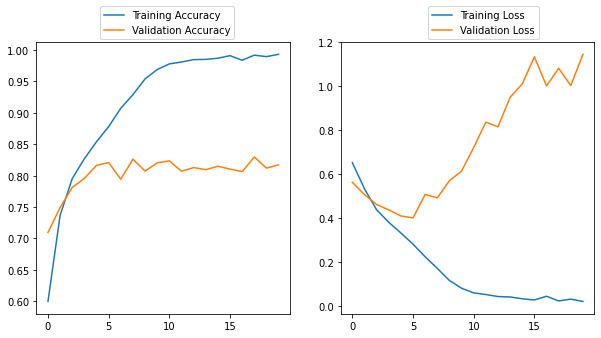

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, accuracy, label='Training Accuracy')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.legend(bbox_to_anchor=(0.8,1.15), ncol=1)

plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(bbox_to_anchor=(0.8, 1.15), ncol=1)

plt.show()

In [ ]:
model.evaluate(x_test,y_test)

234/234 [==============================] - 3s 12ms/step - loss: 1.1451 - accuracy: 0.8169


[1.145147681236267, 0.8169428110122681]

In [ ]:
y_hat = model.predict(x_test)

In [ ]:
print(y_test[0])
print(y_hat[0])

tf.Tensor([0. 1.], shape=(2,), dtype=float32)
[8.219307e-04 9.991780e-01]


In [ ]:
labels = np.argmax(y_test, axis=1)
predictions = np.argmax(y_hat, axis=1)

In [ ]:
print(y_hat.shape)
print(predictions.shape)

(7484, 2)
(7484,)


In [ ]:
print(labels[:5])
print(predictions[:5])

[1 0 0 0 0]
[1 1 0 0 0]


In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels, predictions)

In [ ]:
confusion_matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[3110,  657],
       [ 713, 3004]], dtype=int32)>

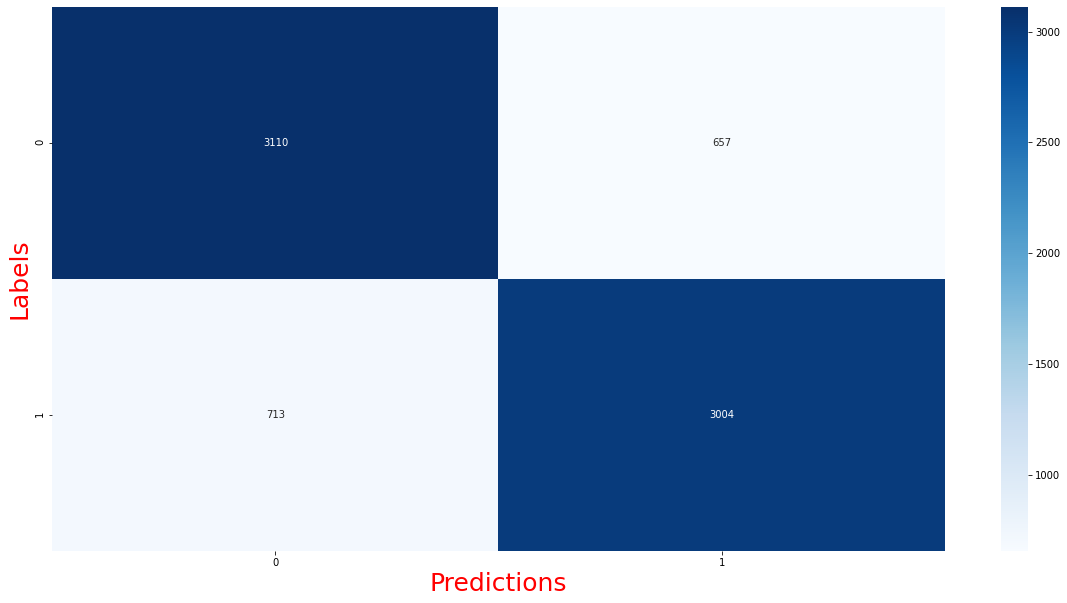

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues',fmt='')
plt.xlabel('Predictions', color='r', fontsize=25)
plt.ylabel('Labels', color='r', fontsize=25)
plt.show()

In [ ]:
label = []
for i in range(len(labels)):
    if labels[i] == 0:
        label.append('Cat')
    else:
        label.append('Dog')

In [ ]:
prediction = []
for i in range(len(predictions)):
    if predictions[i] == 0:
        prediction.append('Cat')
    else:
        prediction.append('Dog')

20


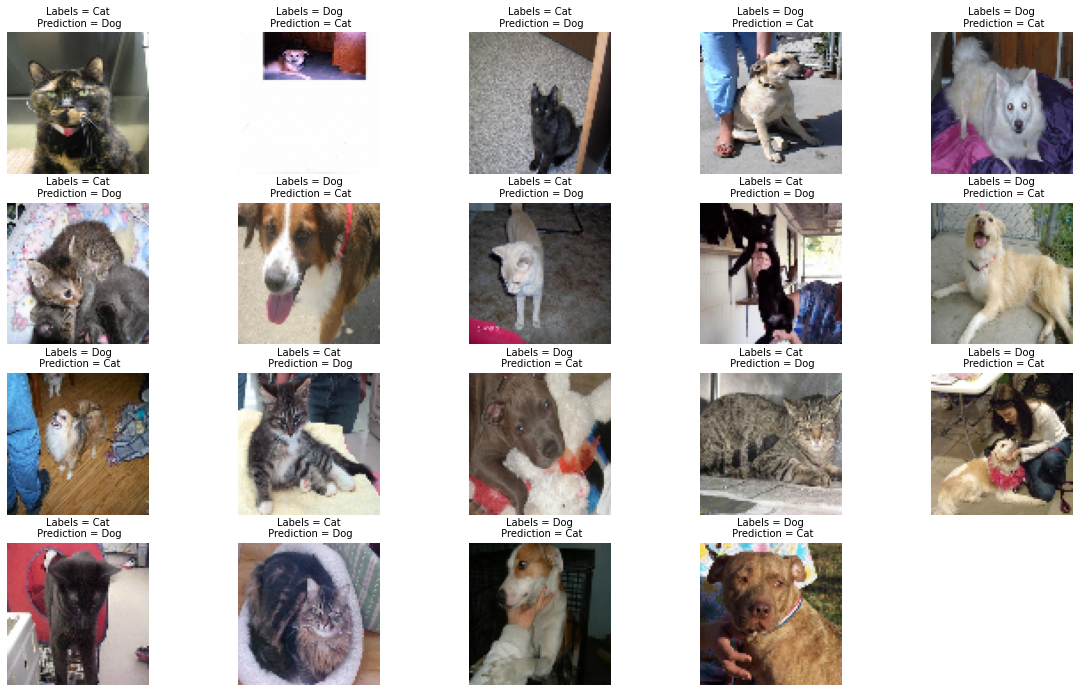

In [ ]:
plt.figure(figsize=(20,12))
n=100
j=1
for i in range(n):
    if labels[i] != predictions[i]:
        img = x_test[i]
        plt.subplot(4,5,j)
        plt.imshow(img, cmap='gray')
        plt.title(f'Labels = {label[i]}\n Prediction = {prediction[i]}', fontsize=10)
        plt.axis('off')
        j+=1
print(j)
plt.show()